In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 

# variable information 
print(mushroom.variables) 

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [6]:
mushroom = fetch_ucirepo(id=73)  

# Convert to DataFrame
df = pd.concat([mushroom.data.features, mushroom.data.targets], axis=1)

# Print column names
print(df.columns)

# Save to CSV (optional)
df.to_csv("mushroom_dataset.csv", index=False)

# Display first few rows
print(df.head())

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import numpy as np
from matplotlib.lines import Line2D  


In [8]:
df = pd.read_csv('mushroom_dataset.csv')

In [9]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


# Cleaning Data

In [11]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [12]:
missing_roots = df[df['stalk-root'].isnull()]

In [13]:
missing_roots.groupby('habitat').count()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,poisonous
habitat,,,,,,,,,,,,,,,,,,,,,
d,656,656,656,656,656,656,656,656,656,656,...,656,656,656,656,656,656,656,656,656,656
g,288,288,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
l,768,768,768,768,768,768,768,768,768,768,...,768,768,768,768,768,768,768,768,768,768
p,576,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,576
w,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192


### Seems like the missing values on roots are a posibility since mushroom can wrong in different places, like leafes, for this missing we are going to be creating a new letter = not possible to grow roots

In [15]:
df['stalk-root'] = df['stalk-root'].fillna('m')

In [16]:
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64

### We changed the missing values in the column 'stalk-root' to the letter 'm' which means the mushroom is unable to grow roots, since this is a posibility

In [18]:
df.duplicated().sum()

0

### No dups in the dataset

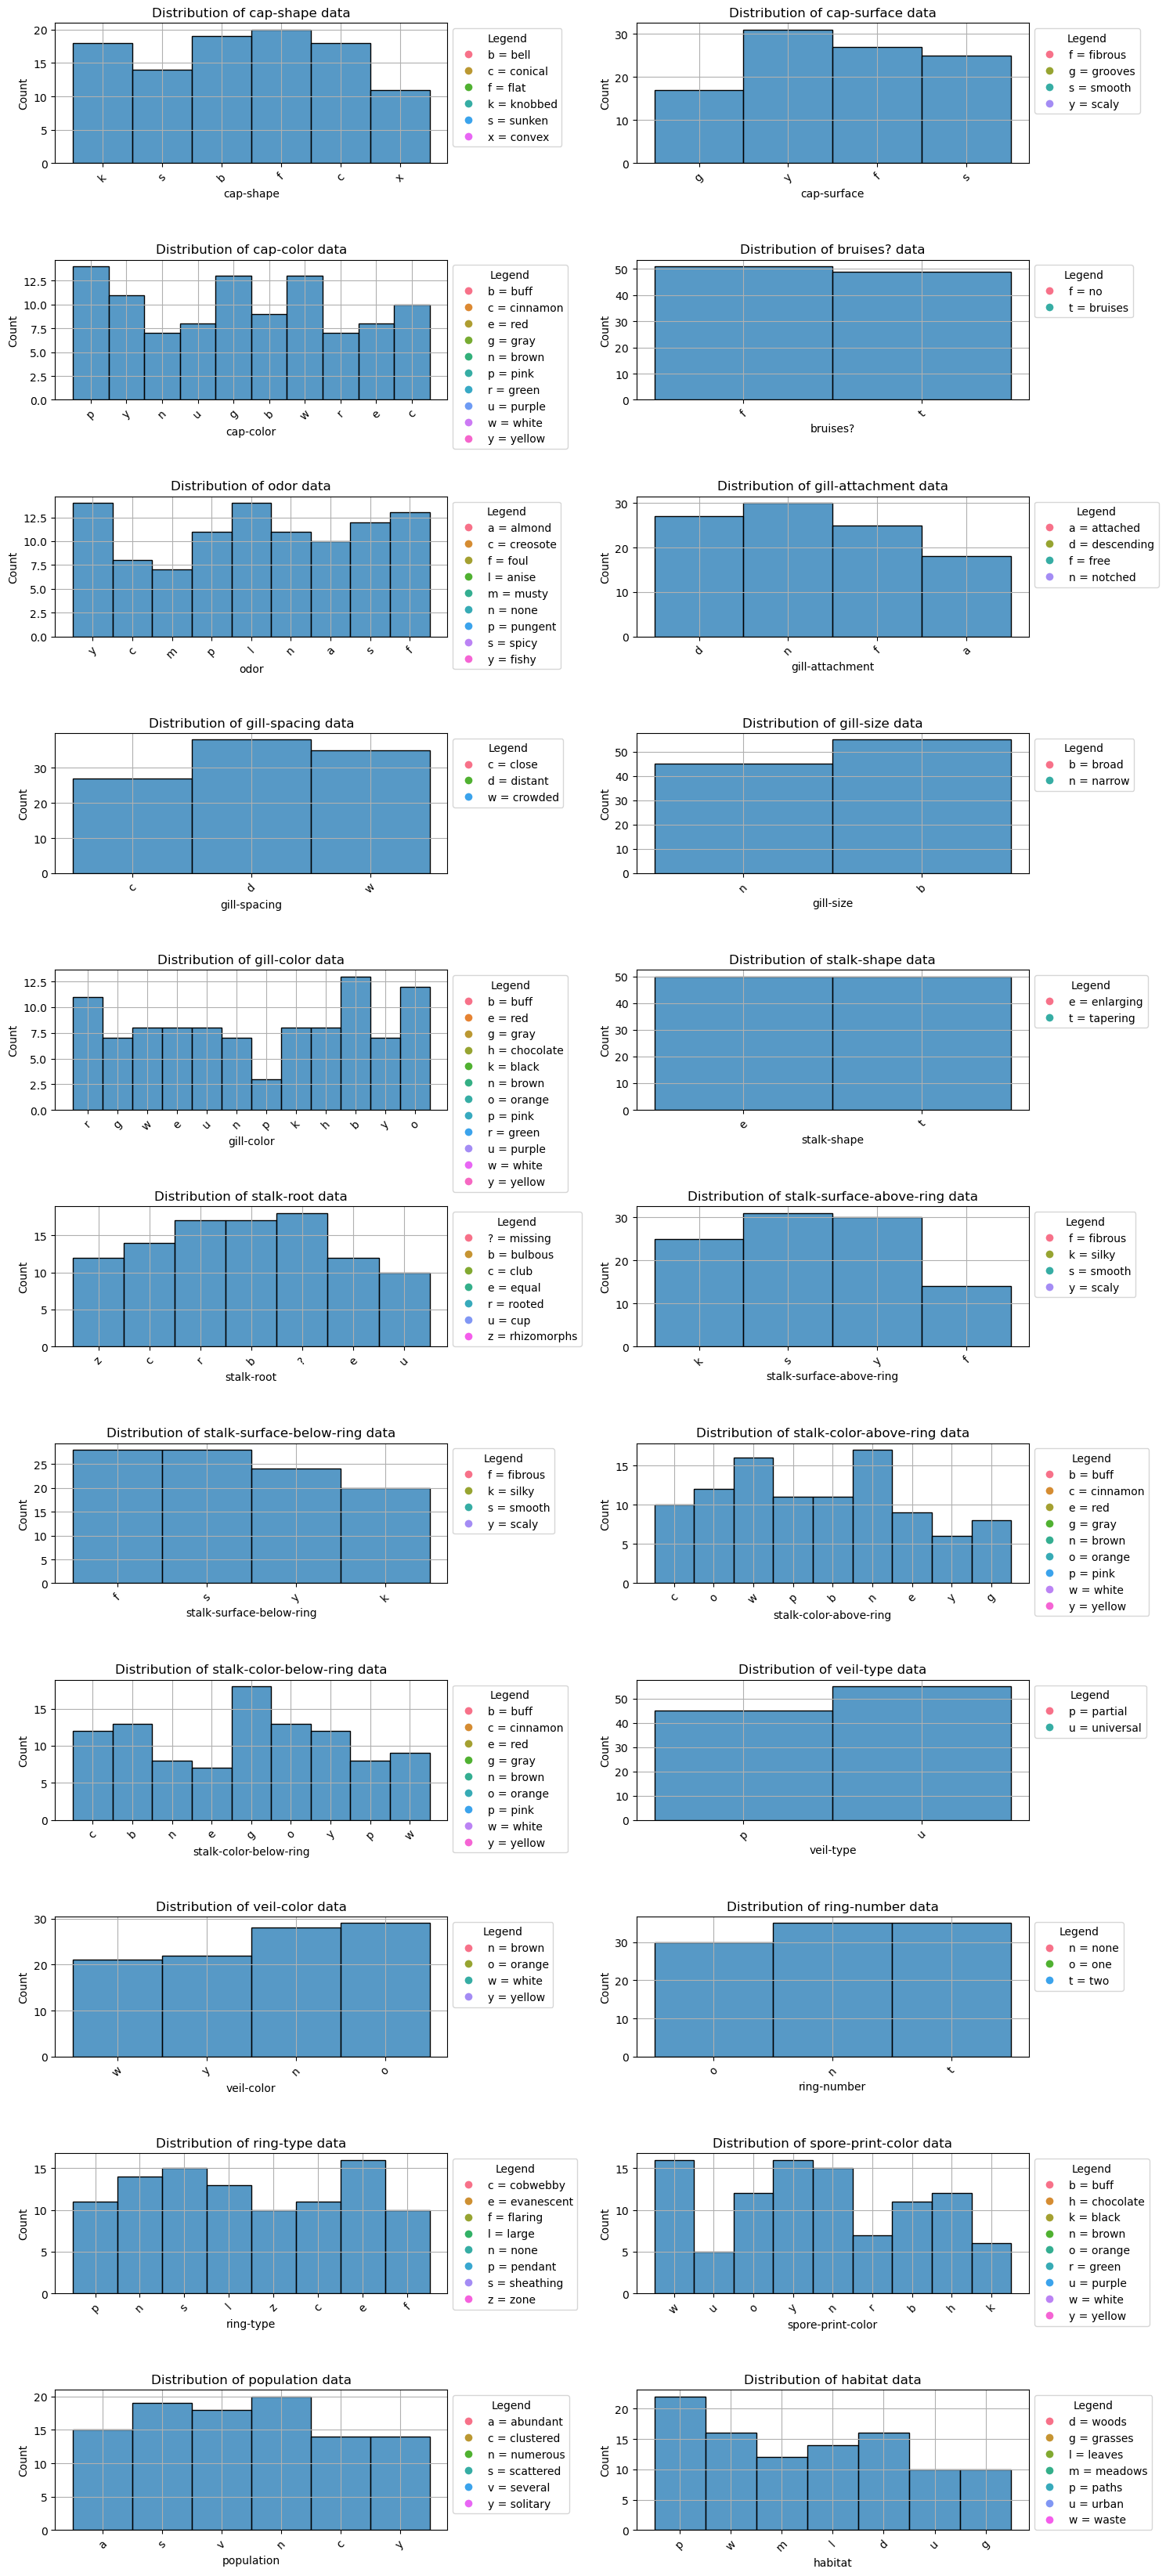

In [20]:

# Define category mappings for each column
category_mappings = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 
                  'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises?': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 
             'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray',
                   'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 
                   'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 
                   'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                               'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                               'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 
                  'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 
                          'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 
                   'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 
                'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Generate a sample dataset
np.random.seed(0)
df = pd.DataFrame({
    col: np.random.choice(list(mapping.keys()), 100)  # Randomly assign category codes
    for col, mapping in category_mappings.items()
})

# Determine layout for subplots
num_cols = len(df.columns)
rows = (num_cols // 2) + (num_cols % 2)

plt.figure(figsize=(15, rows * 3))

# Plot histograms with legends
for i, col in enumerate(df.columns, 1):
    plt.subplot(rows, 2, i)
    sb.histplot(x=df[col], multiple='dodge')
    plt.title(f'Distribution of {col} data')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Generate legend based on the column's mapping
    unique_values = sorted(df[col].unique())
    colors = sb.color_palette('husl', len(unique_values))
    legend_patches = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=8,
               label=f'{val} = {category_mappings[col].get(val, "Unknown")}')
        for val, c in zip(unique_values, colors)
    ]

    # Position the legend to the right of each subplot
    plt.legend(handles=legend_patches, title='Legend', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Encoding 

### We choose to use Label Encoding since One-hot will be creating a lot of columns and Ordinal encoding gives hierarchy

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
df_encoded = df.copy()
le = LabelEncoder()

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_encoded = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

df_encoded

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,3,1,5,0,8,1,0,1,8,0,...,0,1,1,0,2,1,5,7,0,4
1,4,3,9,1,8,3,1,1,2,0,...,0,5,0,0,3,1,4,7,3,6
2,0,0,4,0,1,1,0,1,10,0,...,2,7,4,0,0,0,6,6,4,3
3,2,3,9,0,4,1,0,1,2,1,...,2,7,0,0,3,1,5,7,3,2
4,2,0,7,0,1,1,1,0,1,0,...,2,6,2,0,3,0,3,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,6,1,7,3,2,0,5,1,...,0,6,5,1,0,2,4,5,2,6
96,2,2,1,1,3,2,1,0,4,0,...,3,3,5,1,1,2,3,1,5,2
97,0,0,5,1,2,2,1,1,4,0,...,1,4,4,1,0,2,2,1,2,0
98,4,0,5,1,0,0,1,1,4,1,...,0,4,5,1,0,2,3,3,2,3


# Export the encoded data as CSV

In [ ]:
df_encoded.to_csv(preprocessing_